In [1]:
import os
import string
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
df=pd.read_csv('startup_funding.csv')

In [3]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [4]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [5]:
df.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

In [6]:
df.tail(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [7]:
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentType    3044 non-null   object
 8   AmountInUSD       3044 non-null   object
 9   Remarks           3044 non-null   object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [9]:
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'

In [10]:
df["year"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year

In [11]:
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [12]:
cnt_srs = df["year"].value_counts()
cnt_srs = cnt_srs.sort_index(ascending=True)

In [13]:
cnt_srs

2015    936
2016    993
2017    687
2018    310
2019    111
2020      7
Name: year, dtype: int64

In [14]:
cnt_srs = df["year"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals over years",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Years 2015 & 2016 has got more number of fundings compared to the other recent years
- We can see a clear decling trend in the number of funding deals from 2016. 

In [15]:
import datetime
df["yearmonth"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').apply(lambda x: datetime.date(x.year,x.month,1))

cnt_srs = df["yearmonth"].value_counts()
cnt_srs = cnt_srs.sort_index()


trace = go.Scatter(
    x=cnt_srs.index.astype(str),
    y=cnt_srs.values,
    marker=dict(
        color="#E53215",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals - month on month",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- We can see a steady decline here as well 

In [16]:
df.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan,2020,2020-01-01
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan,2020,2020-01-01


In [17]:
def clean_amount(x):
    #x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("unknown","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

df["CleanedAmount"] = df["AmountInUSD"].apply(lambda x: float(clean_amount(x)))
AmountInUSD = df["CleanedAmount"]
AmountInUSD = AmountInUSD[~np.isnan(AmountInUSD)]
AmountInUSD = AmountInUSD[AmountInUSD!=-999]

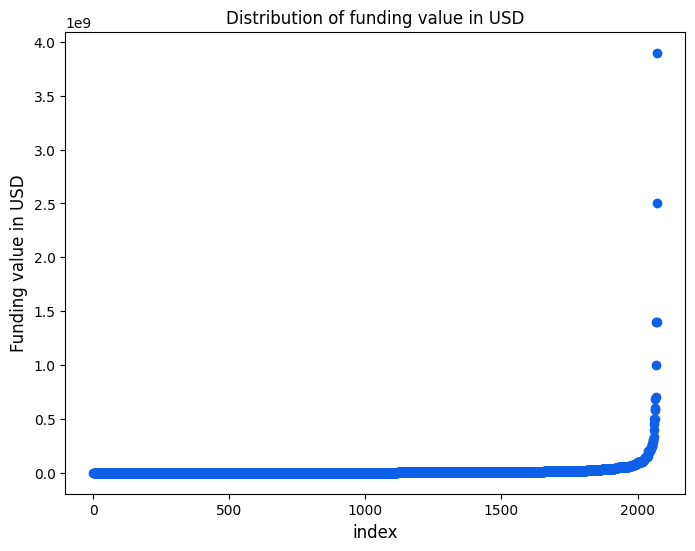

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#0D60E7")
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()

- There are some extreme values at the right

In [19]:
df.iloc[df['CleanedAmount'].sort_values(ascending=False).index[:10]]


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,90,00,00,000",nan,2019,2019-08-01,3.900000e+09
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",nan,2017,2017-08-01,2.500000e+09
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,40,00,00,000",nan,2017,2017-05-01,1.400000e+09
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",nan,2017,2017-03-01,1.400000e+09
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,00,00,00,000",nan,2019,2019-11-01,1.000000e+09
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,"70,00,00,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,"68,00,00,000",Late Stage (Alibaba @ 40% equity),2015,2015-09-01,6.800000e+08
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,nan,Private Equity,"60,00,00,000",nan,2018,2018-08-01,6.000000e+08
33,34,02/10/2019,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series D,"58,50,00,000",nan,2019,2019-10-01,5.850000e+08
2470,2471,01/08/2015,Snapdeal,Ecommerce Marketplace,nan,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"50,00,00,000",Late Stage Round 7th (More details),2015,2015-08-01,5.000000e+08


In [20]:
df["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

cnt_df = df.groupby('year')['CleanedAmount'].agg(["sum", "mean"])
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()

In [21]:
cnt_df

,sum,mean
year,,
2015,8.673018e+09,1.318088e+07
2016,3.828089e+09,6.532574e+06
2017,1.042931e+10,2.287129e+07
2018,5.122367e+09,1.925702e+07
2019,5.850913e+09,5.271092e+07
2020,3.902073e+08,5.574389e+07


In [22]:
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#131413"
    )
)

layout = go.Layout(
    title=go.layout.Title(
        text="Sum of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Though 2016 is the year with most number of funding deals, it is the year with the 2nd lowest sum 
- 2017 has got the highest total amount of funding . Out of the 10B in 2017, 5.5B is raised by Flipkart and PayTM in 3 deals which we can see in the table above the plot.

In [23]:
cnt_srs=cnt_df['mean']
cnt_srs=cnt_srs.sort_index()
cnt_srs

year
2015    1.318088e+07
2016    6.532574e+06
2017    2.287129e+07
2018    1.925702e+07
2019    5.271092e+07
2020    5.574389e+07
Name: mean, dtype: float64

In [24]:
trace=go.Bar(
    x=cnt_srs.index,    
    y=cnt_srs.values,
    marker=dict(
        color='#131413'
    )
)
layout=go.Layout(
    title=go.layout.Title(
        text='Mean of funding value in each year',
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500

)

data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='funding')

> When it comes to the mean value of funding, 2020 leads the pack with an average of 55 Million USD. (This also raises the doubt that whether the low funding deals are not captured properly in the recent days)

In [25]:
import re
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['InvestmentType'] = df['InvestmentType'].apply(lambda x: remove_punctuation(str(x)))


In [26]:
funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

for i, v in funding_map.items():
    df['InvestmentType'][df['InvestmentType']==i] = v 

In [27]:
cnt_srs = df['InvestmentType'].value_counts()
cnt_srs

Seed Funding                   1393
Private Equity                 1357
Seed Angel Funding              141
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
PreSeries A                       8
Private Equity Round              4
Seed                              4
nan                               4
Corporate Round                   2
Equity                            2
Venture Round                     2
Crowd Funding                     2
Series F                          2
Series E                          2
Debt                              1
PrivatenEquity                    1
Angel Funding                     1
Term Loan                         1
Structured Debt                   1
Private                           1
Private Funding                   1
Equity Based Funding              1
Series B Extension                1
Mezzanine                   

In [28]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#416DEC")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Seed funding tops the chart closely followed by Private Equity and seed angel funding
- We can clearly see the decreasing number of deals as we move up the stages of funding rounds like Series A, B, C & D

In [29]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:10,:]
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]

In [30]:
cnt_srs

InvestmentType
Seed Funding          7.757159e+08
Seed Angel Funding    2.256960e+08
PreSeries A           4.137100e+07
Series A              2.031980e+08
Series B              9.491957e+08
Series C              1.044718e+09
Series D              1.481799e+09
Private Equity        2.672787e+10
Name: sum, dtype: float64

In [31]:
layout = go.Layout(
    title=go.layout.Title(
        text="Sum of investment amount by Investment Type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#416DEC")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Private equity funding seems to be the one with high number of deals and the highest sum value of 26.7B raised as well
- Though seed funding has 1388 funding deals, the sum of money raised is just about 775M since they happen during the very early stages of a startup.

In [32]:
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]

layout = go.Layout(
    title=go.layout.Title(
        text="Mean investment amount by Investment Type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#416DEC")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- We can see a clear increase in the mean funding value as we go up the funding round ladder from Seed funding to Series D as expected.

In [33]:
cnt_srs = df['City'].value_counts()[:10]

In [34]:
cnt_srs

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
nan          180
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Name: City, dtype: int64

In [35]:
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
    "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}
for i, v in location_map.items():
    df['City'][df['City']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['City'].value_counts()[:14]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals in each location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#069DCD")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- NCR & Bangalore are almost equal to each other with respect to number of funding deals followed by Mumbai in third place.
- Chennai, Hyderabad & Pune are the next set of cities are that are catching up.

In [36]:
cnt_df = df.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:10,:]

cnt_srs = cnt_df['sum']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Total funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#069DCD")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Though NCR tops the number of funding deals when it comes to the total funding value by location, Bangalore leads the way by a huge margin.

In [37]:
cnt_df = df.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:18,:]

cnt_srs = cnt_df['mean']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#069DCD")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Bangalore tops the list here again
- Jaipur took the fifth spot with respect to mean funding value

In [38]:
temp_df = df.groupby(["City","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
temp_df = temp_df[temp_df["City"].isin(cities_to_use)]
temp_df.columns = ["City", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [39]:
temp_df = df.groupby(["City","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
temp_df = temp_df[temp_df["City"].isin(cities_to_use)]
temp_df.columns = ["City", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding Value by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [40]:
location_map = {
    "eCommerce": "E-Commerce",
    "ECommerce": "E-Commerce"
}
for i, v in location_map.items():
    df['IndustryVertical'][df['IndustryVertical']==i] = v 

cnt_srs = df['IndustryVertical'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Industry Vertical",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Consumer internet got highest number of funding followed by Technolgy and E-commerce

In [41]:
temp_df = df.groupby(["IndustryVertical","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [42]:
temp_df = df.groupby(["IndustryVertical","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding Values by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [43]:
df['InvestorsName'].nunique()

2409

In [44]:
inv_names = []
for invs in df['InvestorsName']:
    for inv in str(invs).split(","):
        if inv != "":
            inv_names.append(inv.strip().lower().replace(" ","_").replace("'",""))

In [45]:
cnt_srs = pd.Series(inv_names).value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Investor Name",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

- Of the disclosed investors, Sequoia capital is the major investor in Indian startups (based on count) followed by Accel partners.
- Kalaari capital and Saif partners have 50 investments each
- Among the individual investors, Ratan Tata leads the pack followed by Rajan Anandan.

In [46]:
df.head(1)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",nan,2020,2020-01-01,200000000.0


# Conclusions

- There were more than 2000 new startups funded in the year between 2015-2017
- Rapido Bike Taxi,Paytm and Flipkart were funded most
- Top 10 investments are made through private equity
- Swiggy and Ola Cabs  were invested by most number of investors
- There were more than 2000 unique investors
- Consumer internet was the top most choice for all investors.
- Top investors funded ecommerce and consumer internet most in terms of amount.
- Most funding came through private equity
- Crowd funding and dept funding were less preferred by the investors
- Seed funding was less dispersed but private equity is choosen to made large investments per startup
- Banglore had the most average funding
- Maximum Total funding was generated in the year 2016 and then it slowly decreased with increase in years
- Average funding was most in 2020


